# RECAP
- Intro: How to read the doc
- Part 1: Tensorflow de-mystified (👨🏻‍🏫 teacher lead)
- Part 2: Boston Housing Challenge (👩‍🎓 student lead)

# Intro: How to read the doc?

✅ [Tensorflow.org](https://www.tensorflow.org/overview) gives you two main pages to refer to:
- [Tutorial](https://www.tensorflow.org/tutorials)
- [Guide](https://www.tensorflow.org/guide)
- **These should be your go-to pages**. You can even run colab-notebooks of the tutorial

&nbsp;

👉 TensorFlow [API docs](https://www.tensorflow.org/api_docs/python/tf/) is more austere, and contains advanced notions
- It pops up in google search in priority
- [Sometime](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), it can give you references to related Tutorials or Guides
- **Use it as single source of truth**

&nbsp;

👉 [Keras.io](https://keras.io/about/) is somehow redundant with TensorFlow doc
- It contains nice Tutorials / Examples when
- Use it only you don't find what you need on TF website
- **Don't use if for the docs**

# Part I. Tensorflow demystified 
( teacher lead)

👉 Goal: Using Tensorflow, create a dummy dataset and fit a dummy model with it

### 1. Tensors?
📚 [Online Guide](https://www.tensorflow.org/guide/tensor)

In [1]:
# It's OK to import everything for notebook experimentation!
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# Tensors are wrappers around numpy objects

X = tf.constant([[1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.]])
X

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [3]:
tf.ones((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
x = X.numpy()
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [5]:
# Tensors have a shape
X.shape

TensorShape([3, 3])

In [6]:
# Tensor can be initialized from numpy objects
tf.constant(x)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [7]:
# They can be manipulated with syntax close to numpy
tf.add(X,X)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [8]:
# Conversely, numpy also accept Tensor elements!
np.add(X,X)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [9]:
# Example of custom MSE loss function using tensors

def loss(y_true, y_pred):
    err = y_true - y_pred
    return tf.reduce_mean(tf.square(err))

y_true = tf.ones((10,3))
y_pred = tf.ones((10,3)) + 0.1 * tf.random.normal((10,3))

loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.010087375>

#### Other Tensors?

**Sparse tensors**
<img src="https://github.com/lewagon/data-images/blob/master/DL/sparse_tensors.png?raw=true">

In [10]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor.shape

TensorShape([3, 4])

**Ragged Tensors**
<img src="https://raw.githubusercontent.com/lewagon/data-images/master/DL/ragged_tensors.png">

In [11]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

TensorShape([4, None])

### 2. Build network with Sequential API

👉 Let's generate 10 random observations `X` of 3 features each, and a target `y` unidimensional

In [15]:
# Let's generate 100 observations of size 10 (features) each
X = tf.random.uniform((100,10))

In [16]:
# And create our dummy target as simply the mean of each observation
y = tf.reduce_mean(X, axis=1)
y.shape

TensorShape([100])

👉 Let's build a simple dense model that "works"

In [17]:
from tensorflow.keras import Sequential, layers

In [18]:
# Usual syntax

model = Sequential()
model.add(layers.Dense(30, input_dim=10, activation='relu'))
#model.add(layers.Dense(30, input_shape=(10,), activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Equivalent
model = Sequential([
    layers.Dense(30, input_shape=(10, ), activation='relu'),
    layers.Dense(1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [20]:
# What if we don't specify input_dim ?
model = Sequential()
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

In [21]:
try:
    model.summary()
    
except ValueError as e:
    print(e)

This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.


In [22]:
# One can still access a layer individually
model.layers

In [23]:
# And call the layer with a "tensor" as input
x1 = model.layers[0](X)

# x1 is our activation from layer 1, with random (initial) weights
x1.shape

TensorShape([100, 30])

In [24]:
# x2 is our output
x2 = model.layers[1](x1)
x2.shape

TensorShape([100, 1])

### 3 Keras Input layer

You will often encounter this in the docs:
```python
keras.Input(shape=(10,))
```
Instead of passing 100 **real** observations to your layers, simply pass a `keras.Input` of `None` observations of similar shape (10,).  

It is used for computation optimization purposes (memory pre-allocation and network graphs for parallelization) 

In [25]:
inputs = keras.Input(shape=(10,))
inputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'input_1')>

In [26]:
model.layers[0](inputs)

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_4')>

In [27]:
x = model.layers[0](inputs) # Input layer
x = layers.Dense(30, activation='relu')(inputs) # First layer output
x = layers.Dense(20, activation='relu')(x) # Second layer output
x = layers.Dense(10, activation='relu')(x) # Third layer output
outputs = layers.Dense(1)(x)               # Final layer output

outputs.shape

TensorShape([None, 1])

In [28]:
# Keras allows you to build a model from an input and output layer
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


☝️ This way of building models is called Keras [Functional API](https://www.tensorflow.org/guide/keras/functional)
- as opposed to [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): `model.add(...)`
- It is mandatory for complex (non-sequential) architecture...
- Used everywhere in the doc

# Part II. Boston Housing Challenge 
(👩‍🎓Student lead)

### Data

We load the Boston Housing dataset that is in the Keras package

In [29]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

X_train.shape

(404, 13)

❓ Normalize your data (by the mean of the train set for instance)

In [30]:
X_test = X_test/X_train.mean(axis=0)
X_train = X_train/X_train.mean(axis=0)

### Declare the general architecture of your model

❓ Import Keras and declare a sequential model

In [31]:
from tensorflow.keras import models

model = models.Sequential()

❓ Add a Dense layer with 50 neurons and the `relu` activation function. Do not forget to tell your `input_dim` to the first layer.

In [32]:
from tensorflow.keras import layers

model.add(layers.Dense(50, input_dim=13, activation="relu"))

❓ Add a second fully connected layer, with 20 neurons and the `relu` activation function.

In [33]:
model.add(layers.Dense(20, activation="relu"))

❓ Add a last layer that suits your regression task

In [34]:
model.add(layers.Dense(1, activation="linear"))

❓ Check and re-count the number of parameters of your model

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


In [36]:
(13*50 + 50) + (50*20 + 20) + (20*1 + 1)

1741

### Define how your model is trained
 
❓ Compile the model with the `adam` optimizer and the `mse` loss

In [37]:
model.compile(optimizer='adam',
              loss='mse')

❓Run the model on this random data ; don't forget to select a number of epochs and a batch_size. Store the returned result in `history`.

In [38]:
history = model.fit(X_train, y_train, 
                    batch_size=16, 
                    epochs=30,
                    verbose=0)

❓ Plot the model convergence

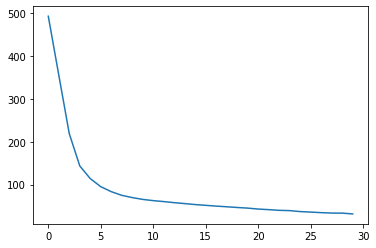

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

❓ Write an entire model with its compilation within an `init_model` function

In [40]:
def init_model():
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam',
              loss='mse')
    
    return model

You are advised to always rebuild a model (with an init function) before fitting some data in order to re-initialize the mode parameters.

However, the model you just wrote is suited for regression tasks.

❓ Write another `init_model_2` function by changing the last layer of the architecture and changing the compilation to be used in a 2-class classification problem

In [41]:
def init_model_2():
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy')
    
    return model

❓ Write a last function to define a model for a classification problem with 10 classes.

In [42]:
def init_model_3():
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy')
    
    return model